<h1 style="text-align:center">Build and Evaluate Classification Models</h1>
<h2 style="text-align:center">Applied Question 13</h2>
<p style="text-align:center">Robert Evans</p>
<p style="text-align:center">School of Technology & Engineering, National University</p>
<p style="text-align:center">DDS-8555: Predictive Analysis</p>
<p style="text-align:center">Dr. Mohammad Yavarimanesh</p>
<p style="text-align:center">February 9, 2025</p>

## Load Libraries

In [1]:
from ISLP import load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
Weekly = load_data('Weekly')

## Prep Data

In [3]:
Weekly['Direction'] = Weekly['Direction'].astype('category')

## Visualize Data

In [4]:
direction_colors = {'Up': 'green', 'Down': 'red'}

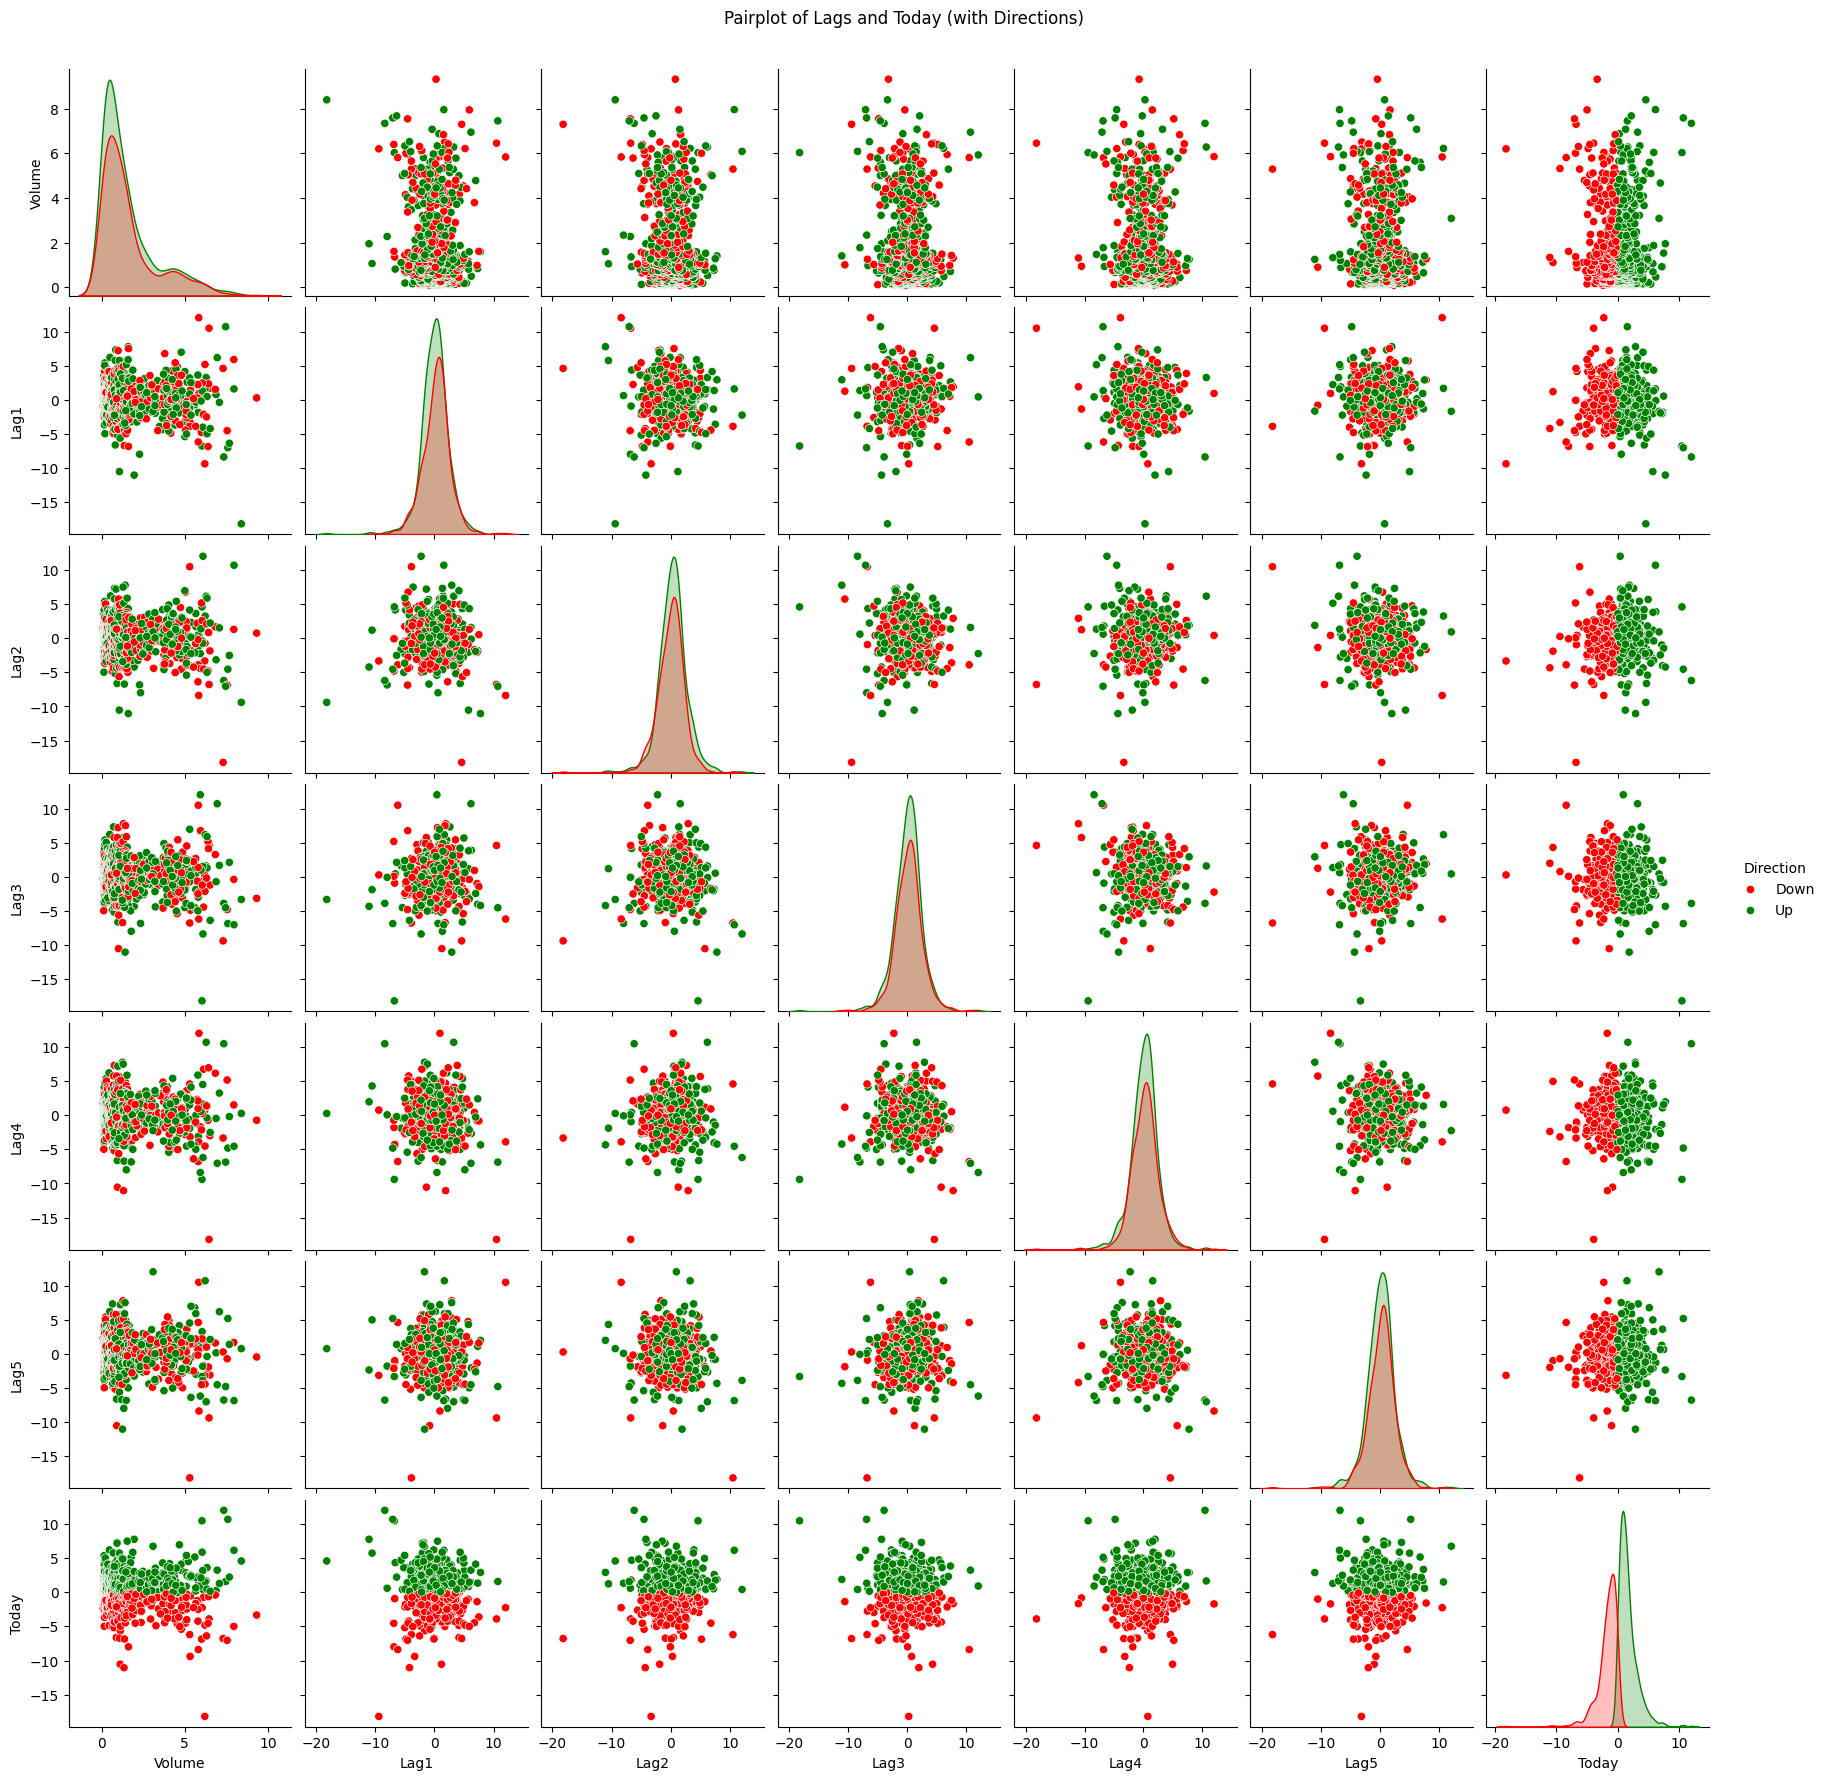

In [5]:
# Plot 4: Pairplot of select Lag variables and Today
selected_columns = ['Volume', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today', 'Direction']
sns.pairplot(Weekly[selected_columns], hue='Direction', palette=direction_colors, diag_kind='kde')
plt.suptitle('Pairplot of Lags and Today (with Directions)', y=1.02)
plt.show()

## Logistic Regression- Full Data Set

In [6]:
Weekly['Direction_binary'] = (Weekly['Direction'] == 'Up').astype(int)

In [7]:
# Define predictors (Lag1 to Lag5 and Volume) and response (Direction_binary)
predictors = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
X = Weekly[predictors]
y = Weekly['Direction_binary']

In [8]:
X = sm.add_constant(X)

In [9]:
logit_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


In [10]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:       Direction_binary   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                0.006580
Time:                        15:43:01   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.0

In [11]:
# Predict probabilities and classify based on a threshold of 0.5
predicted_probs = logit_model.predict(X)
predicted_classes = (predicted_probs > 0.5).astype(int)

In [12]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y, predicted_classes)

In [13]:
# Compute accuracy
accuracy = accuracy_score(y, predicted_classes)

In [14]:
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nOverall Accuracy:", accuracy)

Confusion Matrix:
[[ 54 430]
 [ 48 557]]

Overall Accuracy: 0.5610651974288338


In [15]:
# Extract details from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f"\nTrue Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


True Negatives (TN): 54
False Positives (FP): 430
False Negatives (FN): 48
True Positives (TP): 557


## Model Set Ups
Setting up models in functions for ease of reuse in part J

In [16]:
def logistic_regression(train_data, test_data, columns):
    # Define the training predictors (Lag2) and response
    X_train = train_data[columns]
    X_train = sm.add_constant(X_train)  # Add intercept
    y_train = (train_data['Direction'] == 'Up').astype(int)

    # Fit logistic regression model
    logit_model_lag2 = sm.Logit(y_train, X_train).fit()

    # Define the testing predictors (Lag2) and response
    X_test = test_data[columns]
    X_test = sm.add_constant(X_test)  # Add intercept
    y_test = (test_data['Direction'] == 'Up').astype(int)

    # Make predictions on the test set
    test_probs = logit_model_lag2.predict(X_test)
    test_preds = (test_probs > 0.5).astype(int)

    # Predict probabilities and classify based on a threshold of 0.5
    predicted_probs = logit_model.predict(X)
    predicted_classes = (predicted_probs > 0.5).astype(int)

    # Compute the confusion matrix and accuracy
    conf_matrix = confusion_matrix(y_test, test_preds)
    accuracy = accuracy_score(y_test, test_preds)

    # Breakdown confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()

    return {'Method': 'Logistic Regression', 'Accuracy': accuracy, 'True Negatives (TN)': tn, 'False Positives (FP)': fp, 'False Negatives (FN)': fn, 'True Positives (TP)': tp}

In [17]:
def lda_analysis(train_data, test_data, columns):
    # Define the training predictors (Lag2) and response
    X_train = train_data[columns]
    y_train = (train_data['Direction'] == 'Up').astype(int)

    # Define the testing predictors (Lag2) and response
    X_test = test_data[columns]
    y_test = (test_data['Direction'] == 'Up').astype(int)

    # Fit the LDA model
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train, y_train)

    # Make predictions on the test set
    test_preds = lda_model.predict(X_test)
    
    # Compute the confusion matrix and accuracy
    conf_matrix = confusion_matrix(y_test, test_preds)
    accuracy = accuracy_score(y_test, test_preds)

    # Breakdown confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()

    return {'Method': 'Linear Discriminant Analysis', 'Accuracy': accuracy, 'True Negatives (TN)': tn, 'False Positives (FP)': fp, 'False Negatives (FN)': fn, 'True Positives (TP)': tp}

In [18]:
def qda_analysis(train_data, test_data, columns):
    # Define the training predictors (Lag2) and response
    X_train = train_data[columns]
    y_train = (train_data['Direction'] == 'Up').astype(int)

    # Define the testing predictors (Lag2) and response
    X_test = test_data[columns]
    y_test = (test_data['Direction'] == 'Up').astype(int)

    # Fit the QDA model
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(X_train, y_train)

    # Make predictions on the test set
    test_preds = qda_model.predict(X_test)

    # Compute the confusion matrix and accuracy
    conf_matrix = confusion_matrix(y_test, test_preds)
    accuracy = accuracy_score(y_test, test_preds)

    # Breakdown confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()

    return {'Method': 'Quadratic Discriminant Analysis', 'Accuracy': accuracy, 'True Negatives (TN)': tn, 'False Positives (FP)': fp, 'False Negatives (FN)': fn, 'True Positives (TP)': tp}

In [19]:
def knn_analysis(train_data, test_data, columns, neighbors=1):
    # Define the training predictors (Lag2) and response
    X_train = train_data[columns].values
    y_train = (train_data['Direction'] == 'Up').astype(int).values
    
    # Define the testing predictors (Lag2) and response
    X_test = test_data[columns].values
    y_test = (test_data['Direction'] == 'Up').astype(int).values
    
    # Standardize the predictors (important for KNN)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit the KNN model with K=1
    knn_model = KNeighborsClassifier(n_neighbors=neighbors)
    knn_model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    test_preds = knn_model.predict(X_test_scaled)
    
    # Compute the confusion matrix and accuracy
    conf_matrix = confusion_matrix(y_test, test_preds)
    accuracy = accuracy_score(y_test, test_preds)
    
    # Breakdown confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()
    
    return {'Method': f"K-Nearest Neighbors (N={neighbors})", 'Accuracy': accuracy, 'True Negatives (TN)': tn, 'False Positives (FP)': fp, 'False Negatives (FN)': fn, 'True Positives (TP)': tp}

In [20]:
def nb_analysis(train_data, test_data, columns):
    # Define the training predictors (Lag2) and response
    X_train = train_data[columns].values
    y_train = (train_data['Direction'] == 'Up').astype(int).values
    
    # Define the testing predictors (Lag2) and response
    X_test = test_data[columns].values
    y_test = (test_data['Direction'] == 'Up').astype(int).values
    
    # Standardize the predictors (important for Naive Bayes)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit the Naive Bayes model
    nb_model = GaussianNB()
    nb_model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    test_preds = nb_model.predict(X_test_scaled)
    
    # Compute the confusion matrix and accuracy
    conf_matrix = confusion_matrix(y_test, test_preds)
    accuracy = accuracy_score(y_test, test_preds)
    
    # Breakdown confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()

    return {'Method': 'Naive Bayes', 'Accuracy': accuracy, 'True Negatives (TN)': tn, 'False Positives (FP)': fp, 'False Negatives (FN)': fn, 'True Positives (TP)': tp}

In [21]:
def run_models(data_set, columns, neighbors=1):
    # Filter data for training (1990-2008) and testing (2009-2010)
    train_data = data_set[(data_set['Year'] >= 1990) & (data_set['Year'] <= 2008)]
    test_data = data_set[(data_set['Year'] >= 2009) & (data_set['Year'] <= 2010)]
    results = []
    results.append(logistic_regression(train_data, test_data, columns))
    results.append(lda_analysis(train_data, test_data, columns))
    results.append( qda_analysis(train_data, test_data, columns))
    results.append(knn_analysis(train_data, test_data, columns, neighbors))
    results.append( nb_analysis(train_data, test_data, columns))
    return pd.DataFrame(results)

In [22]:
results = run_models(Weekly, ['Lag2'])

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


In [23]:
results

,Method,Accuracy,True Negatives (TN),False Positives (FP),False Negatives (FN),True Positives (TP)
0,Logistic Regression,0.625000,9,34,5,56
1,Linear Discriminant Analysis,0.625000,9,34,5,56
2,Quadratic Discriminant Analysis,0.586538,0,43,0,61
3,K-Nearest Neighbors (N=1),0.490385,22,21,32,29
4,Naive Bayes,0.586538,0,43,0,61


## Other Models- Lag1, & Lag4

In [24]:
results_L1 = run_models(Weekly, ['Lag1'])
results_L1

Optimization terminated successfully.
         Current function value: 0.685506
         Iterations 4


,Method,Accuracy,True Negatives (TN),False Positives (FP),False Negatives (FN),True Positives (TP)
0,Logistic Regression,0.567308,4,39,6,55
1,Linear Discriminant Analysis,0.567308,4,39,6,55
2,Quadratic Discriminant Analysis,0.586538,0,43,0,61
3,K-Nearest Neighbors (N=1),0.461538,17,26,30,31
4,Naive Bayes,0.586538,0,43,0,61


In [25]:
results_L4 = run_models(Weekly, ['Lag4'])
results_L4

Optimization terminated successfully.
         Current function value: 0.687562
         Iterations 4


,Method,Accuracy,True Negatives (TN),False Positives (FP),False Negatives (FN),True Positives (TP)
0,Logistic Regression,0.586538,0,43,0,61
1,Linear Discriminant Analysis,0.586538,0,43,0,61
2,Quadratic Discriminant Analysis,0.538462,7,36,12,49
3,K-Nearest Neighbors (N=1),0.500000,17,26,26,35
4,Naive Bayes,0.538462,7,36,12,49


## Other Models- Lag2 Changing Nearest Neighbors

In [26]:
train_data = Weekly[(Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)]
test_data = Weekly[(Weekly['Year'] >= 2009) & (Weekly['Year'] <= 2010)]
results = []
columns = ['Lag2']
for i in range(1,10):
    results.append(knn_analysis(train_data, test_data, columns, i))

In [27]:
pd.DataFrame(results)

,Method,Accuracy,True Negatives (TN),False Positives (FP),False Negatives (FN),True Positives (TP)
0,K-Nearest Neighbors (N=1),0.490385,22,21,32,29
1,K-Nearest Neighbors (N=2),0.471154,31,12,43,18
2,K-Nearest Neighbors (N=3),0.567308,16,27,18,43
3,K-Nearest Neighbors (N=4),0.576923,26,17,27,34
4,K-Nearest Neighbors (N=5),0.538462,16,27,21,40
5,K-Nearest Neighbors (N=6),0.500000,20,23,29,32
6,K-Nearest Neighbors (N=7),0.548077,16,27,20,41
7,K-Nearest Neighbors (N=8),0.557692,20,23,23,38
8,K-Nearest Neighbors (N=9),0.557692,17,26,20,41
